# Education Analysis

1. Citywide Attendance Data
- What is the attendance percentage and chronically absent percentage over the years?

- What is the attendance percentage and chronically absent percentage by grade over the years?

- Compare the attendance percantage to the chronically absent percentage


2. Citywide Demographic Data
- What is the total enrollment over the years?

- What is the total enrollment by grade over the years? 

- What is the average demographic enrollment percentage?


3. Citywide Graduation Data 
- What is the graduation percentage over the years?
 
-

-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Citywide Attendance Data

In [2]:
edu_df = pd.read_csv("/Users/sa17/Library/Mobile Documents/com~apple~CloudDocs/Brag Folder/projects/Education-Capstone/data/2016-17_-_2020-23_Citywide_End-of-Year_Attendance_and_Chronic_Absenteeism_Data_20250604.csv")

edu_df

,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,All Grades,All Students,2018-19,30887,2278,28609,92.6,192,47,24.5
1,All Grades,All Students,2019-20,21101,1500,19601,92.9,204,58,28.4
2,All Grades,All Students,2020-21,32686,3931,28755,88.0,199,84,42.2
3,All Grades,All Students,2021-22,31663,4751,26912,85.0,190,113,59.5
4,All Grades,All Students,2022-23,32663,4159,28504,87.3,206,104,50.5
...,...,...,...,...,...,...,...,...,...,...
53602,12,All Students,2018-19,62398,10686,51712,82.9,363,200,55.1
53603,12,All Students,2019-20,39800,6585,33215,83.5,352,194,55.1
53604,12,All Students,2020-21,68770,15327,53443,77.7,398,224,56.3
53605,12,All Students,2021-22,60634,16098,44536,73.5,355,263,74.1


In [3]:
edu_df.describe()

,# Total Days
count,5.360700e+04
mean,2.654513e+04
std,4.314677e+04
min,1.000000e+00
25%,8.036000e+03
50%,1.332000e+04
75%,2.304100e+04
max,1.024625e+06


In [4]:
edu_df.shape

(53607, 10)

In [5]:
edu_df.isna().sum()

Grade                                            0
Category                                         0
Year                                             0
# Total Days                                     0
# Days Absent                                    0
# Days Present                                   0
% Attendance                                     0
# Contributing 10+ Total Days and 1+ Pres Day    0
# Chronically Absent                             0
% Chronically Absent                             0
dtype: int64

In [6]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53607 entries, 0 to 53606
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Grade                                          53607 non-null  object
 1   Category                                       53607 non-null  object
 2   Year                                           53607 non-null  object
 3   # Total Days                                   53607 non-null  int64 
 4   # Days Absent                                  53607 non-null  object
 5   # Days Present                                 53607 non-null  object
 6   % Attendance                                   53607 non-null  object
 7   # Contributing 10+ Total Days and 1+ Pres Day  53607 non-null  object
 8   # Chronically Absent                           53607 non-null  object
 9   % Chronically Absent                           53607 non-null

In [38]:
# Change objects into integers
columns = [
    "# Days Absent",
    "# Days Present",
    "% Attendance",
    "# Contributing 10+ Total Days and 1+ Pres Day",
    "# Chronically Absent",
    "% Chronically Absent"
]

for col in columns:
    edu_df[col] = pd.to_numeric(edu_df[col], errors="coerce")    
    if "#" in col:
        edu_df[col] = edu_df[col].astype("Int64")

In [39]:
edu_df.dtypes

Grade                                             object
Category                                          object
Year                                              object
# Total Days                                       int64
# Days Absent                                      Int64
# Days Present                                     Int64
% Attendance                                     float64
# Contributing 10+ Total Days and 1+ Pres Day      Int64
# Chronically Absent                               Int64
% Chronically Absent                             float64
dtype: object

What is the attendance percentage over the years?

In [40]:
# Select only all grades
attend_df = edu_df[(edu_df["Grade"] ==  "All Grades")]

attend_df

,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,All Grades,All Students,2018-19,30887,2278,28609,92.6,192,47,24.5
1,All Grades,All Students,2019-20,21101,1500,19601,92.9,204,58,28.4
2,All Grades,All Students,2020-21,32686,3931,28755,88.0,199,84,42.2
3,All Grades,All Students,2021-22,31663,4751,26912,85.0,190,113,59.5
4,All Grades,All Students,2022-23,32663,4159,28504,87.3,206,104,50.5
...,...,...,...,...,...,...,...,...,...,...
53577,All Grades,All Students,2018-19,112306,18753,93553,83.3,666,373,56.0
53578,All Grades,All Students,2019-20,73228,12417,60811,83.0,652,354,54.3
53579,All Grades,All Students,2020-21,112857,24696,88161,78.1,655,365,55.7
53580,All Grades,All Students,2021-22,103648,28690,74958,72.3,609,443,72.7


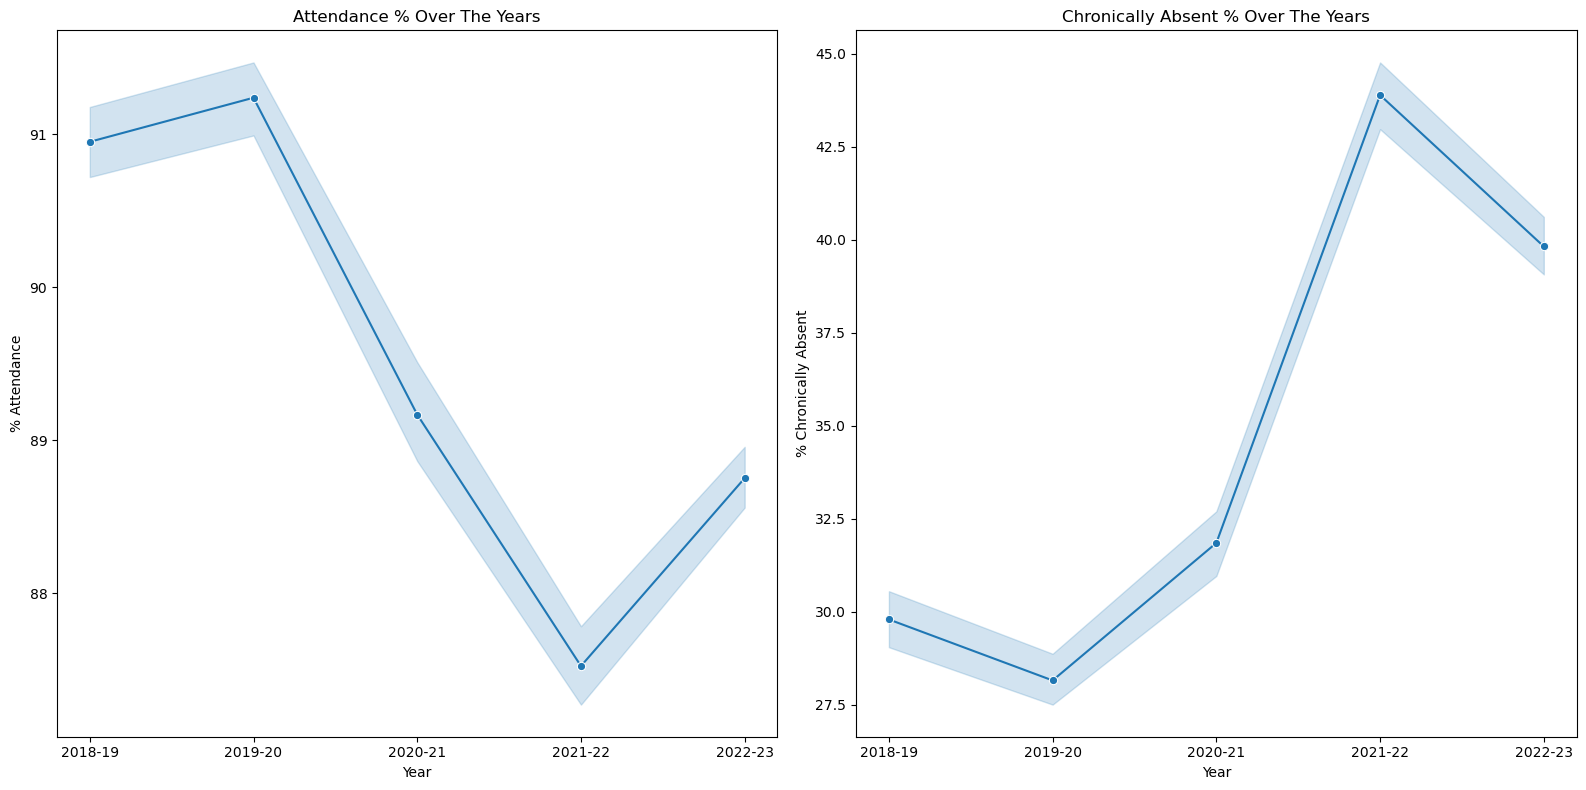

In [41]:
# Plot graph
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.lineplot(data=attend_df, x="Year", y="% Attendance", marker="o")
plt.title("Attendance % Over The Years")

plt.subplot(1, 2, 2)
sns.lineplot(data=attend_df, x="Year", y="% Chronically Absent", marker="o")
plt.title("Chronically Absent % Over The Years")

plt.tight_layout()
plt.show()

The attendance rate of students tremendously dropped in 2019 from 93% to 86% in 2021. The chronically absent rate had an inverse effect from the attendance rate where it steadily increased from 2019 to 2021.

What is the attendance percentage and chronically absent percentage by grade over the years?

In [10]:
# Filter out only all grades 
grade_df = edu_df[(edu_df["Grade"] !=  "All Grades")]

grade_df

,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
5,PK in K-12 Schools,All Students,2018-19,2104,245.0,1859.0,88.4,15.0,7.0,46.7
6,PK in K-12 Schools,All Students,2019-20,1490,198.0,1292.0,86.7,15.0,10.0,66.7
7,PK in K-12 Schools,All Students,2020-21,2830,467.0,2363.0,83.5,18.0,10.0,55.6
8,PK in K-12 Schools,All Students,2021-22,2812,598.0,2214.0,78.7,18.0,12.0,66.7
9,PK in K-12 Schools,All Students,2022-23,2136,336.0,1800.0,84.3,13.0,10.0,76.9
...,...,...,...,...,...,...,...,...,...,...
53602,12,All Students,2018-19,62398,10686.0,51712.0,82.9,363.0,200.0,55.1
53603,12,All Students,2019-20,39800,6585.0,33215.0,83.5,352.0,194.0,55.1
53604,12,All Students,2020-21,68770,15327.0,53443.0,77.7,398.0,224.0,56.3
53605,12,All Students,2021-22,60634,16098.0,44536.0,73.5,355.0,263.0,74.1


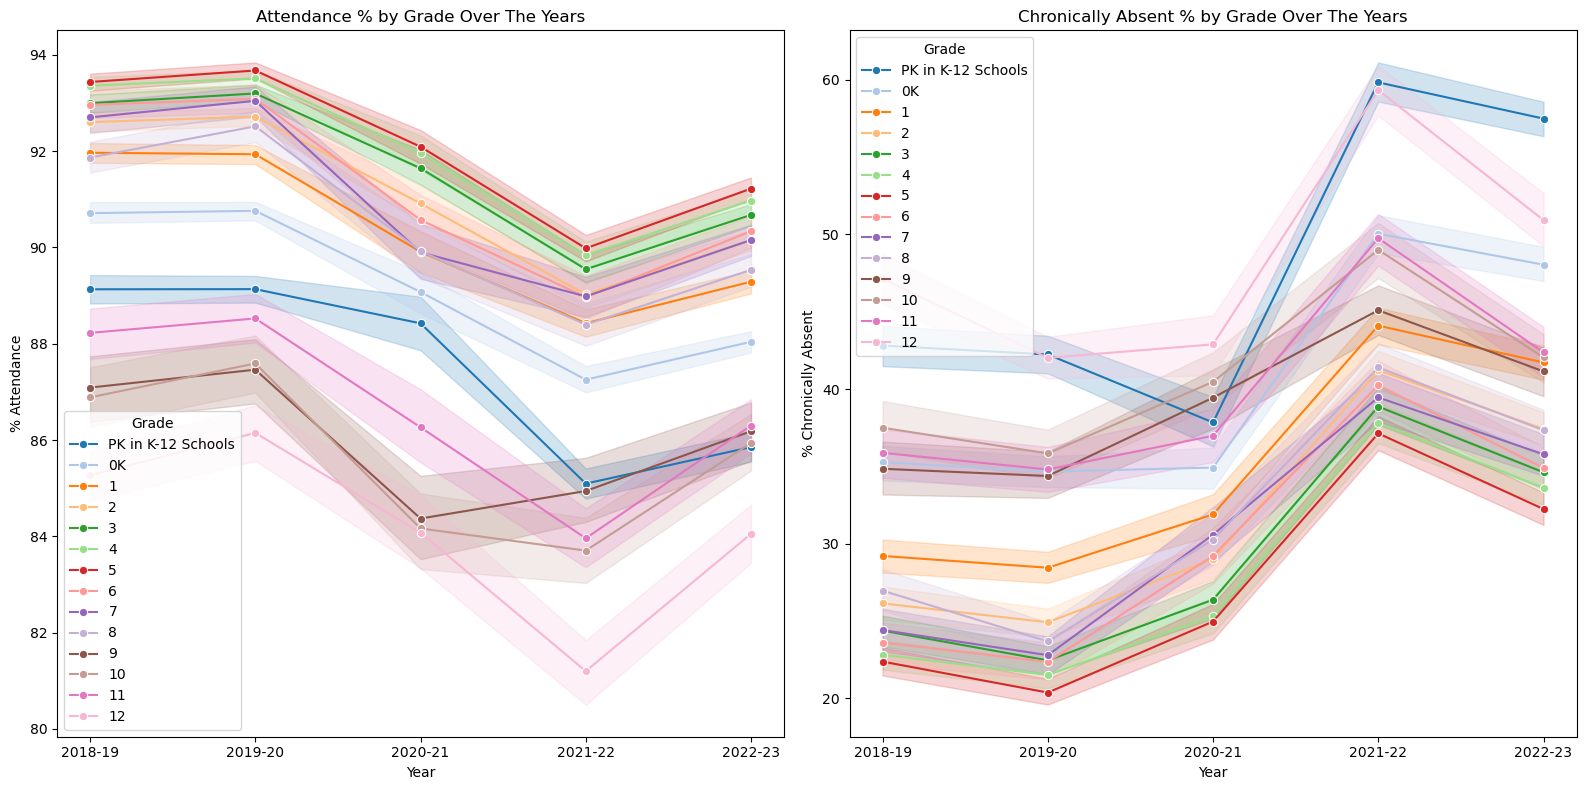

In [42]:
# Plot graoh
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.lineplot(data=grade_df, x="Year", y="% Attendance", hue="Grade", marker="o")
plt.title("Attendance % by Grade Over The Years")

plt.subplot(1, 2, 2)
sns.lineplot(data=grade_df, x="Year", y="% Chronically Absent", hue="Grade", marker="o")
plt.title("Chronically Absent % by Grade Over The Years")

plt.tight_layout()        
plt.show()

Every single grade has similar attendance rates and they all suffered a drop in 2019. Additionally, every single grade except one chronically absent rate is similar and increased steadily from 2019.

Compare attendance percantage to chronically absent percentage 

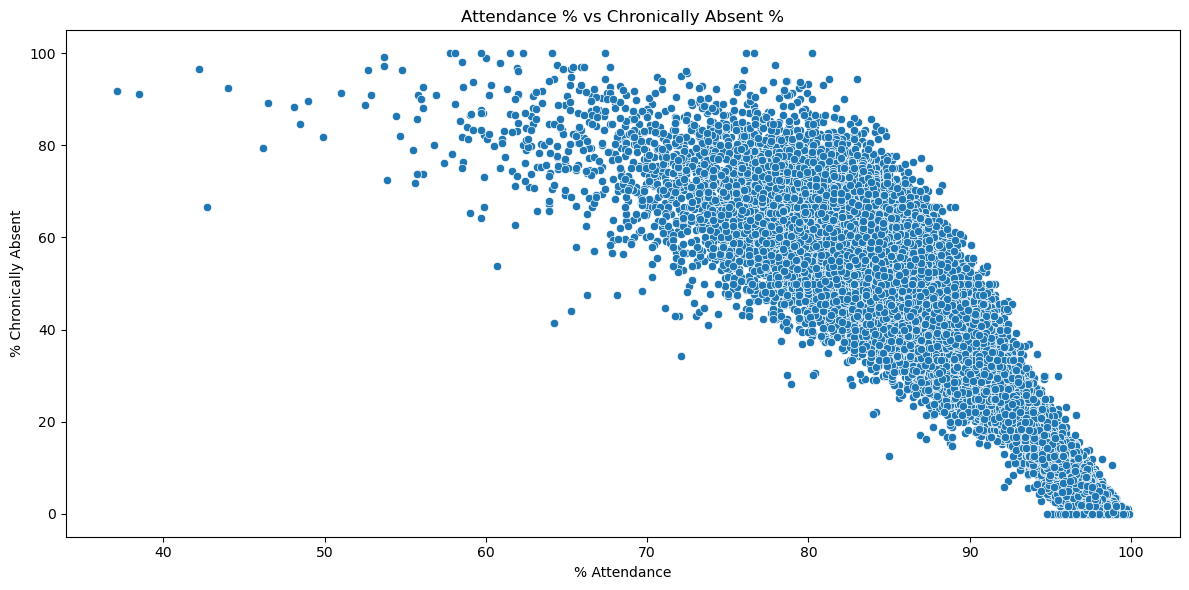

In [43]:
# Plot graph
plt.figure(figsize=(12, 6))
sns.scatterplot(data=edu_df, x="% Attendance", y="% Chronically Absent")
plt.title("Attendance % vs Chronically Absent %")
plt.tight_layout()
plt.show()

When Attendance % is low 40%–60%, the Chronically Absent % tends to between 60%–80%. When Attendance % is above 90%, the Chronically Absent % is near 0%. There's a downward slope that becomes closer together as attendance increases which means schools with high attendance rates have fewer chronically absent students.

## 2. Citywide Demographic Data

In [13]:
demo_df = pd.read_csv("/Users/sa17/Library/Mobile Documents/com~apple~CloudDocs/Brag Folder/projects/Education-Capstone/data/2019-20_Demographic_Snapshot_-_Citywide_20250604.csv")

demo_df

,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,2015-16,1133963,71847,84386,87804,86930,85309,81287,79581,76798,...,0.021,167465,0.148,222496,0.196,142506,0.126,801696,0.707,0.621
1,2016-17,1141232,72553,82517,86008,86279,85050,84185,80563,78985,...,0.023,169803,0.149,228347,0.200,153466,0.134,800985,0.702,0.610
2,2017-18,1135334,71528,81588,83578,83978,84363,83367,83277,79114,...,0.025,170417,0.150,231910,0.204,153661,0.135,856483,0.754,0.719
3,2018-19,1126501,73904,78627,81908,81205,81706,82510,82044,81289,...,0.027,169583,0.151,234497,0.208,148815,0.132,834003,0.740,0.713
4,2019-20,1131868,87480,78587,79171,80298,79555,80287,81513,80250,...,0.031,170370,0.151,230983,0.204,142386,0.126,821883,0.726,0.719


In [14]:
demo_df.describe()

,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.133780e+06,75462.400000,81141.000000,83693.800000,83738.000000,83196.600000,82327.200000,81395.60000,79287.200000,77958.800000,...,0.025400,169527.600000,0.149800,229646.600000,0.202400,148166.800000,0.130600,823010.000000,0.725800,0.676400
std,5.353043e+03,6779.870006,2523.208374,3387.752825,2956.046092,2487.013932,1566.082118,1410.66183,1677.172233,1836.713832,...,0.003847,1207.673714,0.001304,4562.218901,0.004561,5571.135943,0.004336,23355.647754,0.021891,0.055784
min,1.126501e+06,71528.000000,78587.000000,79171.000000,80298.000000,79555.000000,80287.000000,79581.00000,76798.000000,75802.000000,...,0.021000,167465.000000,0.148000,222496.000000,0.196000,142386.000000,0.126000,800985.000000,0.702000,0.610000
25%,1.131868e+06,71847.000000,78627.000000,81908.000000,81205.000000,81706.000000,81287.000000,80563.00000,78985.000000,76778.000000,...,0.023000,169583.000000,0.149000,228347.000000,0.200000,142506.000000,0.126000,801696.000000,0.707000,0.621000
50%,1.133963e+06,72553.000000,81588.000000,83578.000000,83978.000000,84363.000000,82510.000000,81513.00000,79114.000000,78125.000000,...,0.025000,169803.000000,0.150000,230983.000000,0.204000,148815.000000,0.132000,821883.000000,0.726000,0.713000
75%,1.135334e+06,73904.000000,82517.000000,86008.000000,86279.000000,85050.000000,83367.000000,82044.00000,80250.000000,78451.000000,...,0.027000,170370.000000,0.151000,231910.000000,0.204000,153466.000000,0.134000,834003.000000,0.740000,0.719000
max,1.141232e+06,87480.000000,84386.000000,87804.000000,86930.000000,85309.000000,84185.000000,83277.00000,81289.000000,80638.000000,...,0.031000,170417.000000,0.151000,234497.000000,0.208000,153661.000000,0.135000,856483.000000,0.754000,0.719000


In [15]:
demo_df.shape

(5, 37)

In [16]:
demo_df.isna().sum()

Year                                          0
Total Enrollment                              0
Grade 3K+PK (Half Day & Full Day)             0
Grade K                                       0
Grade 1                                       0
Grade 2                                       0
Grade 3                                       0
Grade 4                                       0
Grade 5                                       0
Grade 6                                       0
Grade 7                                       0
Grade 8                                       0
Grade 9                                       0
Grade 10                                      0
Grade 11                                      0
Grade 12                                      0
# Female                                      0
% Female                                      0
# Male                                        0
% Male                                        0
# Asian                                 

In [17]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        5 non-null      object 
 1   Total Enrollment                            5 non-null      int64  
 2   Grade 3K+PK (Half Day & Full Day)           5 non-null      int64  
 3   Grade K                                     5 non-null      int64  
 4   Grade 1                                     5 non-null      int64  
 5   Grade 2                                     5 non-null      int64  
 6   Grade 3                                     5 non-null      int64  
 7   Grade 4                                     5 non-null      int64  
 8   Grade 5                                     5 non-null      int64  
 9   Grade 6                                     5 non-null      int64  
 10  Grade 7           

What is the total enrollment over the years?

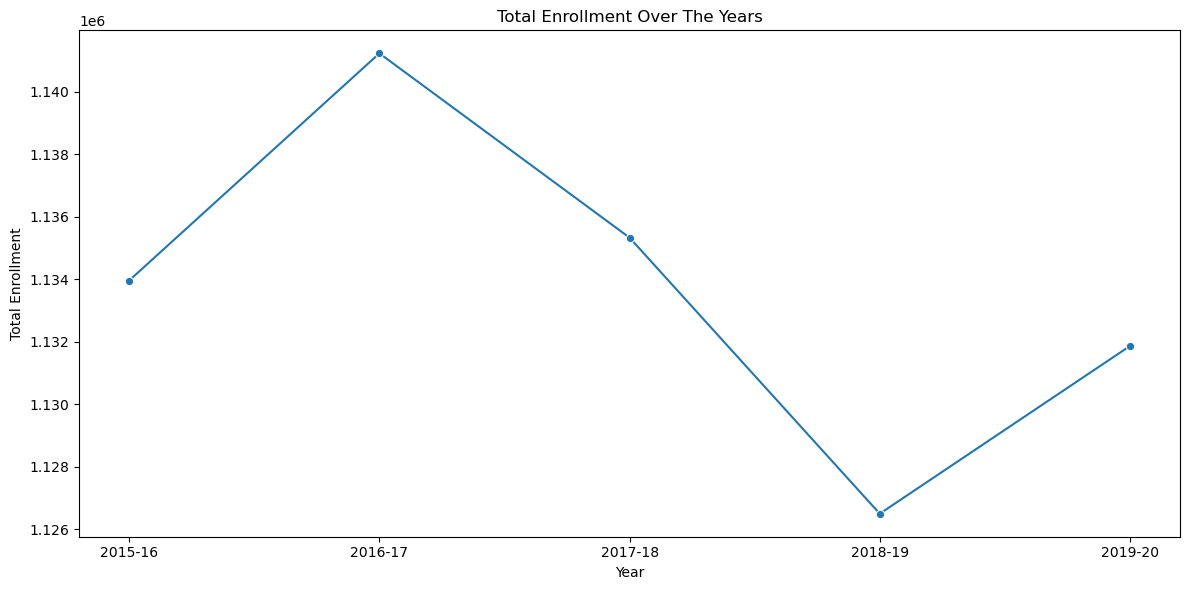

In [18]:
# Plot graoh 
plt.figure(figsize=(12, 6))
sns.lineplot(data=demo_df, x="Year", y="Total Enrollment", marker="o")
plt.title("Total Enrollment Over The Years")
plt.tight_layout()
plt.show()

The  total enrollment rate of students tremendously dropped in 2016 from 1.140 millions to 1.126 millions in 2018.

What is the total enrollment by grade over the years?

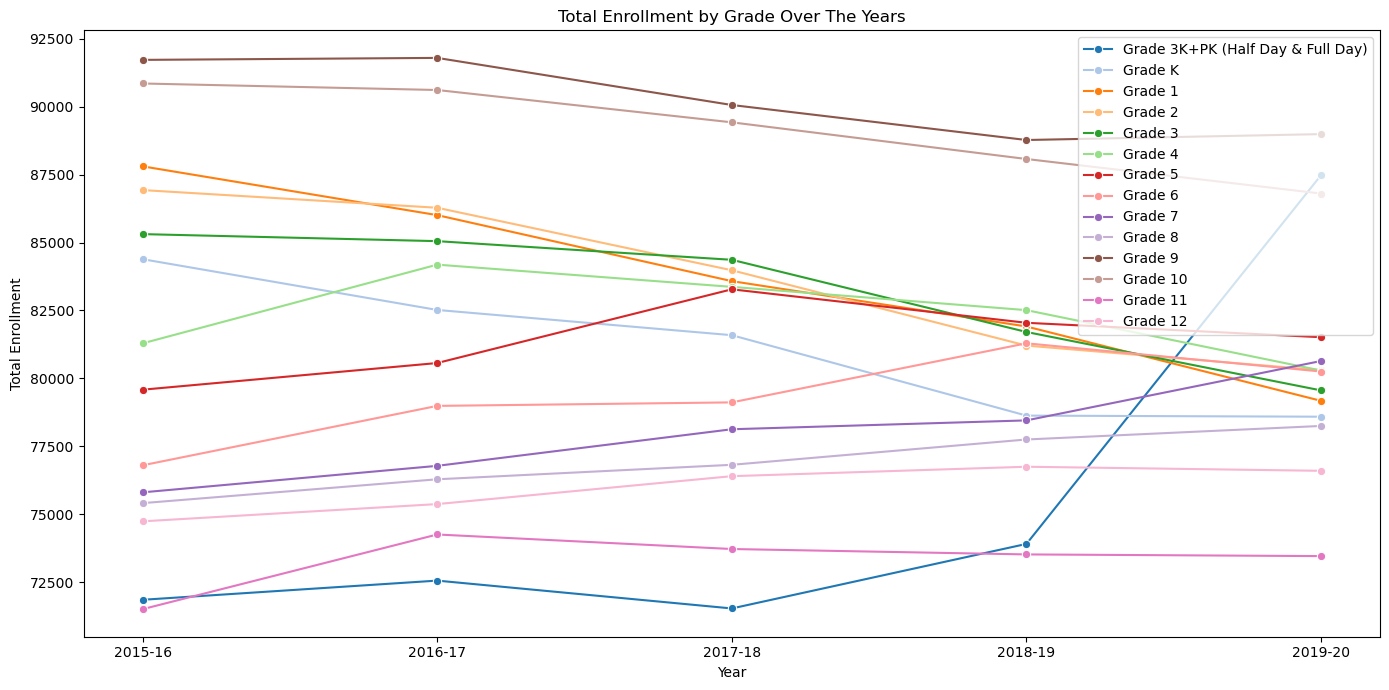

In [19]:
# Select only columns that have Grade in it
grade_cols = demo_df.columns[demo_df.columns.str.contains("Grade")]

# set a distinct color for each grade 
sns.set_palette("tab20", n_colors=len(grade_cols)) 

# Plot graph
plt.figure(figsize=(14, 7)) 

for col in grade_cols:
     sns.lineplot(data=demo_df, x="Year", y=col, marker="o", label=col)

plt.title("Total Enrollment by Grade Over The Years")
plt.ylabel("Total Enrollment")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()



3K+PK (Half Day & Full Day) starts low, but had a huge increase in 2018. Grades K to 5 shows a gradual declines which is typical due to shifting from elementary to middle school.
Middle and high school grades (6-12) look relatively steady or with slight increases/decreases depending on grade.

What is the average demographic enrollment percentage?

In [20]:
# Calculate average % of demographic across all years
dem_cols = ["% Asian", "% Black", "% Hispanic", "% White", "% Multiple Race Categories Not Represented", "% Students with Disabilities" ,"% English Language Learners", "% Poverty"]
avg_dem = demo_df[dem_cols].mean()

# Convert to DataFrame
dem_df = avg_dem.reset_index()
dem_df.columns = ["Demographic", "Average %"]

dem_df


,Demographic,Average %
0,% Asian,0.1598
1,% Black,0.2600
2,% Hispanic,0.4052
3,% White,0.1498
4,% Multiple Race Categories Not Represented,0.0254
5,% Students with Disabilities,0.2024
6,% English Language Learners,0.1306
7,% Poverty,0.7258


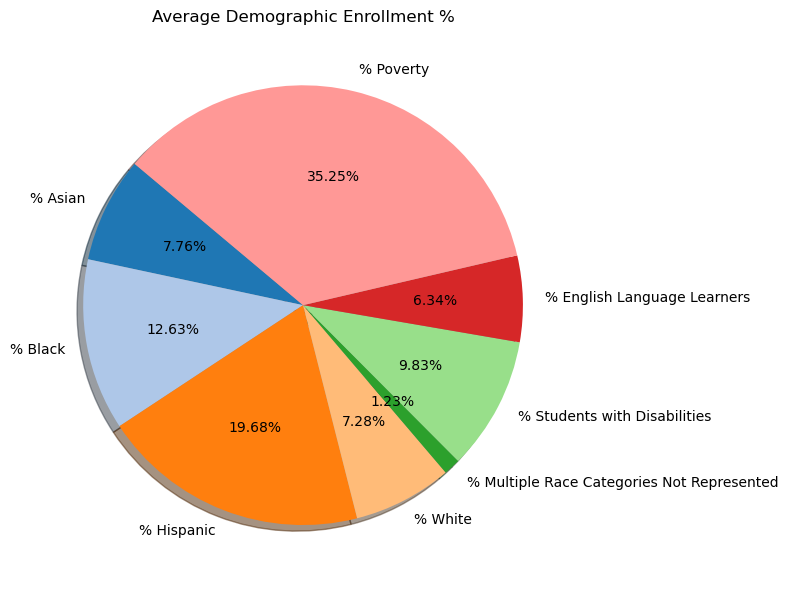

In [21]:
# Plot Graph
labels = dem_cols
sizes = [0.1598, 0.2600, 0.4052, 0.1498, 0.0254, 0.2024, 0.1306, 0.7258] 

plt.figure(figsize=(12, 6))
plt.pie(sizes, labels=labels, autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("Average Demographic Enrollment %")
plt.tight_layout()
plt.show()

Poverty has the highest enrollment rate out of all the demographics and Hispanics has the highest enrollment rate out of all the races.

## 3. Citywide Graduation Data

In [22]:
grad_df = pd.read_csv("/Users/sa17/Library/Mobile Documents/com~apple~CloudDocs/Brag Folder/projects/Education-Capstone/data/Graduation_results_for_Cohorts_2012_to_2019__Classes_of_2016_to_2023__20250609.csv")

grad_df

,Report Category,Geographic Subdivision,School Name,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort
0,Citywide,Citywide,NaN,All Students,2019,4 year August,69893,58503,83.7,58295,...,0.3,0.4,6773,9.7,3748,5.4,260,0.4,569,0.8
1,Citywide,Citywide,NaN,All Students,2018,4 year August,70912,59374,83.7,59110,...,0.4,0.4,6808,9.6,3831,5.4,322,0.5,547,0.8
2,Citywide,Citywide,NaN,All Students,2017,4 year August,72663,60055,82.6,59683,...,0.5,0.6,8225,11.3,3545,4.9,227,0.3,566,0.8
3,Citywide,Citywide,NaN,All Students,2016,4 year August,73565,58704,79.8,57734,...,1.3,1.7,9385,12.8,4338,5.9,269,0.4,852,1.2
4,Citywide,Citywide,NaN,All Students,2015,4 year August,73772,57035,77.3,51848,...,7,9.1,9979,13.5,5745,7.8,317,0.4,692,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,Citywide,Citywide,NaN,Not Econ Disadv,2016,6 year June,19240,16841,87.5,16635,...,1.1,1.2,660,3.4,1450,7.5,80,0.4,206,1.1
1126,Citywide,Citywide,NaN,Not Econ Disadv,2015,6 year June,19850,16798,84.6,15651,...,5.8,6.8,986,5,1756,8.8,80,0.4,229,1.2
1127,Citywide,Citywide,NaN,Not Econ Disadv,2014,6 year June,20675,16664,80.6,15451,...,5.9,7.3,1175,5.7,2465,11.9,127,0.6,242,1.2
1128,Citywide,Citywide,NaN,Not Econ Disadv,2013,6 year June,22350,17653,79,16264,...,6.2,7.9,1269,5.7,2886,12.9,304,1.4,230,1


In [23]:
grad_df.describe()

,School Name,Cohort Year,# Total Cohort
count,0.0,1130.000000,1130.000000
mean,NaN,2015.183186,18619.454867
std,NaN,2.148409,20351.068315
min,NaN,2012.000000,1.000000
25%,NaN,2013.000000,5078.250000
50%,NaN,2015.000000,10498.500000
75%,NaN,2017.000000,28566.750000
max,NaN,2019.000000,74948.000000


In [24]:
grad_df.shape

(1130, 29)

In [25]:
grad_df.isna().sum()

Report Category                            0
Geographic Subdivision                     0
School Name                             1130
Category                                   0
Cohort Year                                0
Cohort                                     0
# Total Cohort                             0
# Grads                                    0
% Grads                                    0
# Total Regents                            0
% Total Regents of Cohort                  0
% Total Regents of Grads                   0
# Advanced Regents                         0
% Advanced Regents of Cohort               0
% Advanced Regents of Grads                0
# Regents without Advanced                 0
% Regents without Advanced of Cohort       0
% Regents without Advanced of Grads        0
# Local                                    0
% Local of Cohort                          0
% Local of Grads                           0
# Still Enrolled                           0
% Still En

In [26]:
grad_df.pop("School Name")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1125   NaN
1126   NaN
1127   NaN
1128   NaN
1129   NaN
Name: School Name, Length: 1130, dtype: float64

In [29]:
grad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Report Category                       1130 non-null   object
 1   Geographic Subdivision                1130 non-null   object
 2   Category                              1130 non-null   object
 3   Cohort Year                           1130 non-null   int64 
 4   Cohort                                1130 non-null   object
 5   # Total Cohort                        1130 non-null   int64 
 6   # Grads                               1130 non-null   object
 7   % Grads                               1130 non-null   object
 8   # Total Regents                       1130 non-null   object
 9   % Total Regents of Cohort             1130 non-null   object
 10  % Total Regents of Grads              1130 non-null   object
 11  # Advanced Regents            

In [36]:
# Select only columns with # or % to convert to int
column = [col for col in grad_df.columns if "#" in col or "%" in col]

for col in column:
    grad_df[col] = pd.to_numeric(grad_df[col], errors="coerce")
    if "#" in col:
        grad_df[col] = grad_df[col].astype("Int64")

In [37]:
grad_df.dtypes

Report Category                          object
Geographic Subdivision                   object
Category                                 object
Cohort Year                               int64
Cohort                                   object
# Total Cohort                            Int64
# Grads                                   Int64
% Grads                                 float64
# Total Regents                           Int64
% Total Regents of Cohort               float64
% Total Regents of Grads                float64
# Advanced Regents                        Int64
% Advanced Regents of Cohort            float64
% Advanced Regents of Grads             float64
# Regents without Advanced                Int64
% Regents without Advanced of Cohort    float64
% Regents without Advanced of Grads     float64
# Local                                   Int64
% Local of Cohort                       float64
% Local of Grads                        float64
# Still Enrolled                        

What is the graduation percentage over the years?

In [46]:
# Extract the number of years from the Cohort column
grad_df["Cohort Duration"] = grad_df["Cohort"].str.extract(r"(\d+)").astype(int)

# Add to Cohort Year to create Graduation Year
grad_df["Graduation Year"] = grad_df["Cohort Year"] + grad_df["Cohort Duration"]


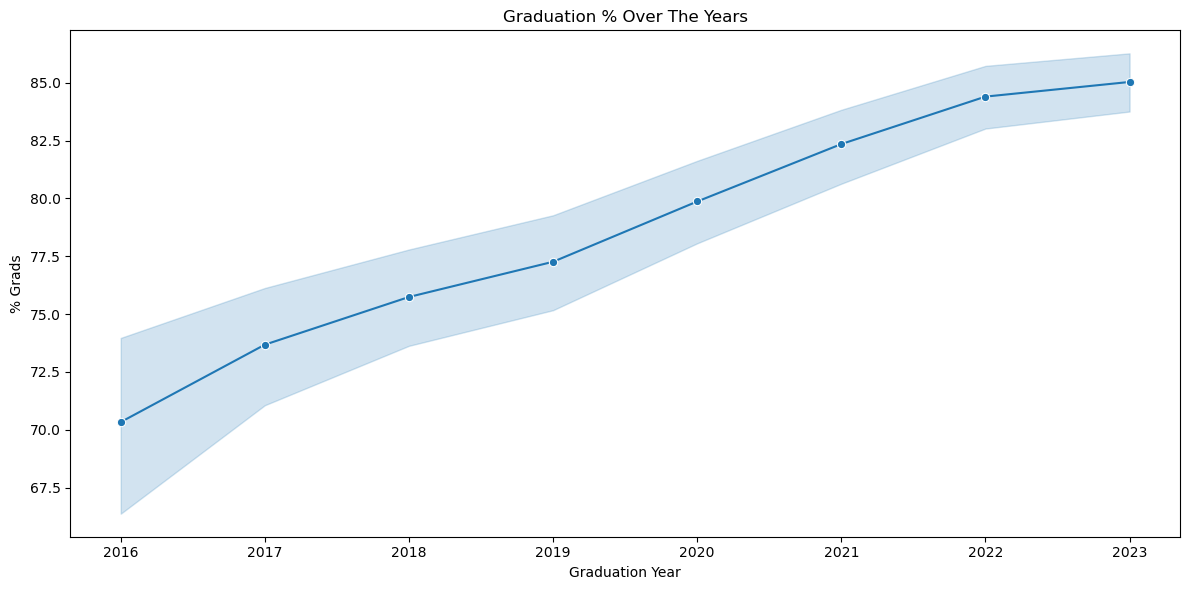

In [49]:
# Plot graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=grad_df, x="Graduation Year", y="% Grads", marker="o")
plt.title("Graduation % Over The Years")
plt.tight_layout()
plt.show()